# Ilustração da convolução como uma média ponderada de translações da imagem de entrada

O objetivo desta demonstração é ilustrar a implementação da convolução discreta linear utilizando
o algoritmo da média ponderada das translações da imagem. Esta implementação é apropriada para o
NumPy pois as translações são implementadas na forma de fatiamento

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys,os
ia898path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

In [3]:
def iaconvdemo(f, h):
    """
    Inputs:
    f = image
    h = kernel
    """
    f = f.astype(float)
    h = h.astype(float)

    # If the arrays are 1D, convert them to 2D for generality purposes
    if len(f.shape) == 1: f = f[np.newaxis,:]
    if len(h.shape) == 1: h = h[np.newaxis,:]
    #if f.size < h.size:  (f, h) = (h, f) # Always iterate over the smaller image
    g = np.zeros(np.array(f.shape) + np.array(h.shape) - 1) # Allocating memory to store the convolution result
    
    mask_h = np.zeros(h.shape,dtype = bool)
    mask_g = np.zeros(g.shape,dtype = bool)
     
    for i in range(h.shape[0]):
        for j in range(h.shape[1]):
            g[i:i+f.shape[0], j:j+f.shape[1]] += h[i,j] * f
            mask_h[i,j] = True
            mask_g[i:i+f.shape[0], j:j+f.shape[1]] = True
            mask_h[i,j] = False
            mask_g[i:i+f.shape[0], j:j+f.shape[1]] = False
            
    return g

Na convolução linear, ambas as imagens são infinitas com valores zeros fora da área da matriz. As dimensões da imagem resultante
será a soma das dimensões de cada imagem menos 1.

Equação
========

$$    (f \ast h)(x,y) =  \sum_{i=0}^{N-1} \sum_{j=0}^{M-1} f_{e}(x-i,y-j) h_{e}(i, j) $$

$$     f_{e}(x,y) = \left\{ \begin{array}{llcl} f(x,y), & 0 \leq x \leq A-1 & and & 0 \leq y \leq B-1\\
       0, & A \leq x \leq N-1 & or & B \leq y \leq M-1 \end{array}\right.\\$$
       
$$     h_{e}(x,y) = \left\{ \begin{array}{llcl} h(x,y), & 0 \leq x \leq C-1 & and & 0 \leq y \leq D-1  \\
       0, & C \leq x \leq N-1 & or & D \leq y \leq M-1 \end{array}\right.\\$$       

$$     N \geq A + C - 1 \\ $$
$$     M \geq  B + D - 1 \\ $$

Ilustração da convolução 1D
============================

Esta primeira ilustração, temos uma imagem unidimensional com 6 elementos e o núcleo da convolução com 3 elementos. O resultado
da convolução terá 8 elementos. Acompanhe o passo a passo da execução do algoritmo. O algoritmo original é o `ia636:iaconv` que foi
trazido para esta página e incorporado visualizações ilustrativas durante a sua execução.

In [4]:
f = np.array([0,1,2,3,4,5])
h = np.array([-1,0,1])

print ('f =\n', f)
print ('\nh = \n', h)
print ('\n f*h = \n',iaconvdemo(f, h))

f =
 [0 1 2 3 4 5]

h = 
 [-1  0  1]

 f*h = 
 [[ 0. -1. -2. -2. -2. -2.  4.  5.]]


O código abaixo tenta ilustrar o processo da convolução 1-D com 8 passos. Siga os passos e verifique, que o valor de saída em g (vetor mais abaixo dos três) é a mutiplicação entre os valores de intersecção entre f e h.

In [5]:
f = np.array([1,1,1,1,1])
h = np.array([1,1,1])
g = np.array([0,0,0,0,0,0,0])
print('f=\n',f)
print('h=\n',h)

print ('\n')
print('passo 1:')
print('          %30s' % f)
print('%30s' % h)
print('              %30s' % g)

g[0]=1;
print ('\n')
print('passo 2:')
print('          %30s' % f)
print('  %30s' % h)
print('              %30s' % g)


g[1]=2;
print ('\n')
print('passo 3:')
print('          %30s' % f)
print('    %30s' % h)
print('              %30s' % g)

g[2]=3;
print ('\n')
print('passo 4:')
print('          %30s' % f)
print('      %30s' % h)
print('              %30s' % g)

g[3]=3;
print ('\n')
print('passo 5:')
print('          %30s' % f)
print('        %30s' % h)
print('              %30s' % g)

g[4]=3;
print ('\n')
print('passo 6:')
print('          %30s' % f)
print('          %30s' % h)
print('              %30s' % g)

g[5]=2;
print ('\n')
print('passo 6:')
print('          %30s' % f)
print('            %30s' % h)
print('              %30s' % g)

g[6]=1;
print ('\n')
print('passo 7:')
print('          %30s' % f)
print('              %30s' % h)
print('              %30s' % g)

print ('\n')
print('passo 8:')
print('          %30s' % f)
print('                %30s' % h)
print('              %30s' % g)

f=
 [1 1 1 1 1]
h=
 [1 1 1]


passo 1:
                             [1 1 1 1 1]
                       [1 1 1]
                             [0 0 0 0 0 0 0]


passo 2:
                             [1 1 1 1 1]
                         [1 1 1]
                             [1 0 0 0 0 0 0]


passo 3:
                             [1 1 1 1 1]
                           [1 1 1]
                             [1 2 0 0 0 0 0]


passo 4:
                             [1 1 1 1 1]
                             [1 1 1]
                             [1 2 3 0 0 0 0]


passo 5:
                             [1 1 1 1 1]
                               [1 1 1]
                             [1 2 3 3 0 0 0]


passo 6:
                             [1 1 1 1 1]
                                 [1 1 1]
                             [1 2 3 3 3 0 0]


passo 6:
                             [1 1 1 1 1]
                                   [1 1 1]
                             [1 2 3 3 3 2 0]


passo 7:
                       

Você pode utilizar a função ravel() para realizar a convolução entre uma imagem e um núcleo bidimensional.

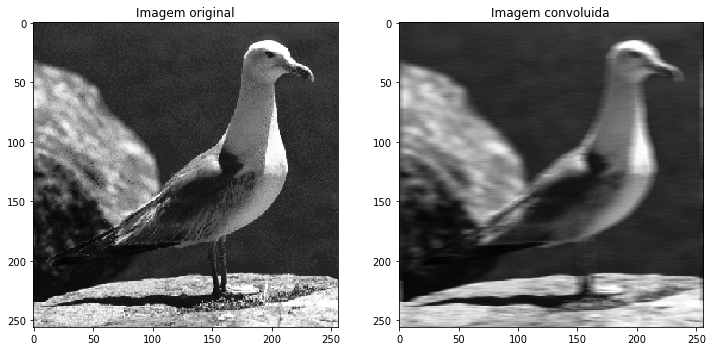

In [6]:
f = mpimg.imread('/home/lotufo/ia898/data/gull.pgm')
h = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])#filtro de borramento
f1D = f.ravel()# imagem no formato de array 1D
h1D = h.ravel()# filtro no formato de array 1D

domain = np.floor((h1D.size)/2).astype(int)
g = iaconvdemo(f1D, h1D)

#Selecionando pontos do domínio da iamgem
g = g[:,domain:f1D.size+domain]
g = g.reshape(f.shape)

plt.figure(1,figsize=[12,12])
plt.subplot(121)
plt.imshow(f,cmap="gray")
plt.title('Imagem original')
plt.subplot(122)
plt.imshow(g,cmap="gray")
plt.title('Imagem convoluida')

Ilustração da convolução 2D
============================

Temos o caso de imagem bidimensional sendo processada por uma máscara Sobel de cálculo de gradiente horizontal. Acompanhe o passo-a-passo:

In [7]:
f = np.array([[1,1,1,1,1],
      [2,2,2,2,2],
      [3,3,3,3,3],
      [4,4,4,4,4],
      [5,5,5,5,5]])
h = np.array([[-1,0,1],
      [-2,0,2],
      [-1,0,1]])

print ('f =\n', f)
print ('\nh = \n', h)
print ('\n f*h = \n',iaconvdemo(f, h))

f =
 [[1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]]

h = 
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]

 f*h = 
 [[ -1.  -1.   0.   0.   0.   1.   1.]
 [ -4.  -4.   0.   0.   0.   4.   4.]
 [ -8.  -8.   0.   0.   0.   8.   8.]
 [-12. -12.   0.   0.   0.  12.  12.]
 [-16. -16.   0.   0.   0.  16.  16.]
 [-14. -14.   0.   0.   0.  14.  14.]
 [ -5.  -5.   0.   0.   0.   5.   5.]]


A convolução 2D em imagens pode ser visualmente interpretado como o deslizamento pontual do núcleo sobre a imagem. Utilize o [link](https://deangeli.bitbucket.io/Main/SpatialDomain/interativeFilteringSpatialDomain.html), para ver de forma dinâmica, como ocorre o processo da convolução em imagens: [blue_text].Apesar da convolução 2D ser espacialamente mais compreensiva do que a convolução 1D, o consumo computacional da concolução 2D é maior, tornando assim preferível a utilização da convolução 1D.

In [8]:
f = mpimg.imread('/home/lotufo/ia898/data/astablet.tif')

h = np.array([[-1,0,1],
      [-2,0,2],
      [-1,0,1]])

fr = f.ravel()
hr = h.ravel()

print("tempo da convolução 2D:\n")
%timeit iaconvdemo(f, h)

print("tempo da convolução 1D:\n")
%timeit iaconvdemo(fr, hr)

tempo da convolução 2D:

100 loops, best of 3: 1.95 ms per loop
tempo da convolução 1D:

1000 loops, best of 3: 906 µs per loop


## Filtro de  Borda

Os núcleos (ou também chamados de filtros) são utilizados na filtragem de imagens. O processo de filtragem de imagem pode ser visto como a extração de algumaa característica da imagem. Por exemplo, o filtro de sobel  é utilizado para identificar regiões de bordas na imagens, pois ele atua com um filtro passa-alta, deixando apenas as regiões de alta frequência passarem. Na imagem, as altas frequências ocorrem em regiões de  transição significativa de iintensidade. Observe o  código a seguir:

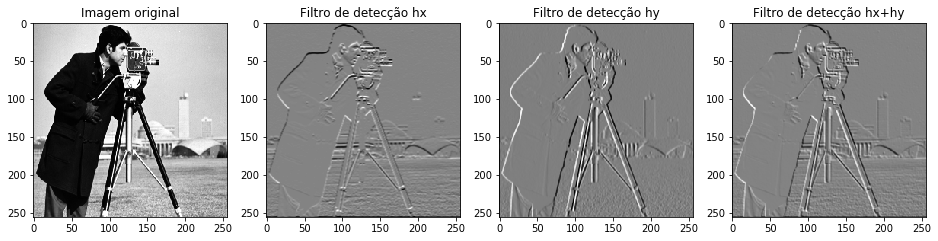

In [47]:
f = mpimg.imread('/home/lotufo/ia898/data/cameraman.tif') #imagem

hy = np.array([[-1,0,1], #filtro de detecção de borda em Y
      [-2,0,2],
      [-1,0,1]])

hx = np.array([[1,2,1], #filtro de detecção de borda em X
      [0,0,0],
      [-1,-2,-1]])

g1 = iaconvdemo(f, hx)
g2 = iaconvdemo(f, hy)

# Removendo píxeis fora do domínio ddee f
H,W = g1.shape; 
g1= g1[1:H-1,1:W-1]
g2= g2[1:H-1,1:W-1]

# Combinando filtros
g3 = g1+g2  

plt.figure(1,figsize=[16,16])
plt.subplot(141)
plt.imshow(f,cmap="gray")
plt.title('Imagem original')
plt.subplot(142)
plt.imshow(g1,cmap="gray")
plt.title('Filtro de detecção hx')
plt.subplot(143)
plt.imshow(g2,cmap="gray")
plt.title('Filtro de detecção hy')
plt.subplot(144)
plt.imshow(g3,cmap="gray")
plt.title('Filtro de detecção hx+hy')

Veja também
============

`ia636:iaconv iaconv`

Páginas Interessantes
=======================

`http://en.wikipedia.org/wiki/Convolution Convolution - Wikipedia`